In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from IPython.display import Markdown as md
from itertools import product
from statsmodels.tsa.arima_model import ARIMA
import warnings

In [2]:
def parser(x):
    return pd.to_datetime(x)

sales=pd.read_csv('sales-cars.csv',index_col=0,parse_dates=[0],date_parser=parser)

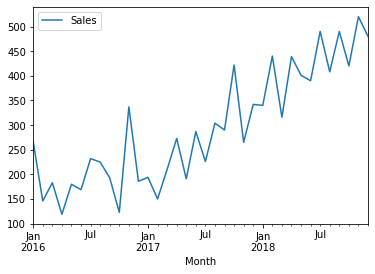

In [3]:
sales.plot()

# Staionarity
#### mean, variance and covariance is constant over periods

In [4]:
sales_diff= sales.diff(periods=1)
sales_diff= sales_diff[1:]

Text(0.5, 1.0, 'Plot after Stationary')

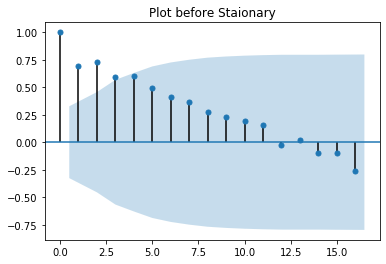

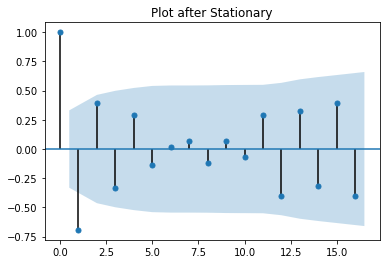

In [5]:
plot_acf(sales)
plt.title('Plot before Staionary')
plot_acf(sales_diff)
plt.title('Plot after Stationary')

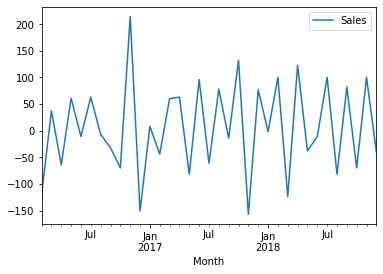

In [6]:
sales_diff.plot()

In [7]:
#split the data into train and test
X_train=sales.values[:len(sales.values)-9] # train size=27
X_test=sales.values[len(sales.values)-9:] #test size=9

In [8]:
# apply AutoRegressive model(AR)
model_ar=AR(X_train)
model_ar=model_ar.fit()
print('coefficients = %s' %model_ar.params)

coefficients = [28.39946621 -0.18777071  0.26291825  0.22469742  0.76487006  0.37410089
  0.05645692 -0.08357127 -0.2586979  -0.1972705 ]


C:\Users\Asus\Miniconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


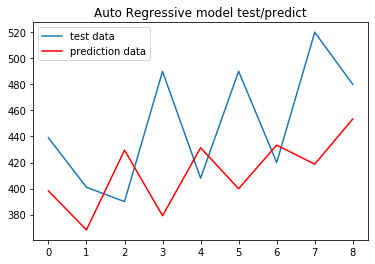

Rmse is = 63.57130292475141

In [9]:
predictions=model_ar.predict(start=len(X_train),end=len(X_train)+len(X_test)-1)
plt.plot(X_test)
plt.plot(predictions,color='red')
plt.title('Auto Regressive model test/predict')
plt.legend(['test data','prediction data'])
plt.show()
md('Rmse is = {}'.format(np.sqrt(mean_squared_error(X_test,predictions))))

# Arima Model
   ##### p=periods taken from AutoRegressive model
   ##### d=integrated order
   ##### q=periods in moving average model

In [17]:

p=d=q=range(0,10)
pdq=list(product(p,d,q))

warnings.filterwarnings('ignore')
aic_list={}
for params in pdq:
    try:
        model_arima=ARIMA(X_train,order=params)
        model_arima_fit=model_arima.fit()
        predictions_Arima=model_arima_fit.forecast(steps=9)[0]
        aic_list.update({params:np.sqrt(mean_squared_error(X_test,predictions_Arima))})
    except:
        continue

In [18]:
min_rmse=min(aic_list, key=aic_list.get)
print('Minimum rmse at : ',min_rmse)
arima=ARIMA(X_train,order=(9,1,0))
arima_fit=arima.fit()
predictions_Arima=arima_fit.forecast(steps=9)[0]

Minimum rmse at :  (6, 2, 0)


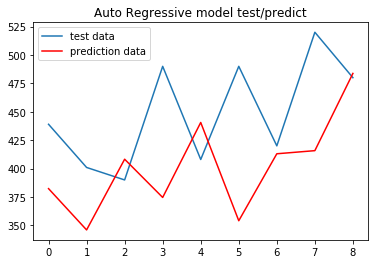

Rmse is = 74.78646644125722

In [19]:
plt.plot(X_test)
plt.plot(predictions_Arima,color='red')
plt.title('Auto Regressive model test/predict')
plt.legend(['test data','prediction data'])
plt.show()
md('Rmse is = {}'.format(np.sqrt(mean_squared_error(X_test,predictions_Arima))))